In [1]:
# Import libraries
# ----------------

# System
import sys

# Logging
import logging
logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

# Pandas
import pandas as pd

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from titanic import data, models

## Data Loading

In [2]:
raw_data_file = "exploration/data/titanic.csv"
df = pd.read_csv(raw_data_file, usecols=['Name', 'Sex', 'Age', 'Survived'])
print('DataFrame shape: {}'.format(df.shape))
df.head()

DataFrame shape: (891, 4)


,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


## Data Cleaning

In [3]:
# Percentage of missing values in each column
pd.DataFrame(
    df.isnull().sum() / len(df),
    columns=['% Missing Values']
).transpose()

NumExpr defaulting to 4 threads.


,Survived,Name,Sex,Age
% Missing Values,0.0,0.0,0.0,0.198653


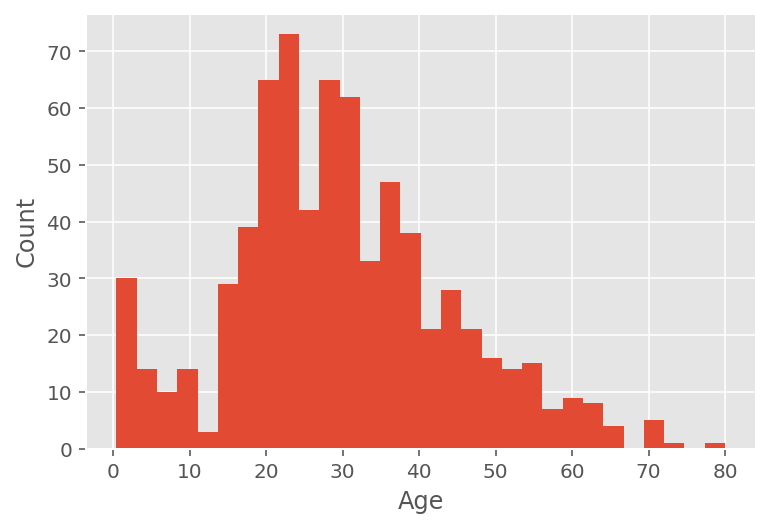

In [4]:
# Age histogram
df.Age.hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [5]:
df = df.astype({
    'Age': 'float64',
    'Name': 'object',
    'Sex': 'category',
    'Survived': 'int64',
})

## REFACTORED Feature Engineering
### The passenger names contain titles which we can use to make predictions under the assumption that more ### ### wealthy people we have been given precedence to the emergency boats. However, some of the 18 titles in the ### data are redundant and can be reduced to 6.



In [6]:
df = data.extract_title(df)
df.head()

Extracting the titles from the name column


,Survived,Name,Sex,Age,Title
0,0,"Braund, Mr. Owen Harris",male,22.0,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Mrs
2,1,"Heikkinen, Miss. Laina",female,26.0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Mrs
4,0,"Allen, Mr. William Henry",male,35.0,Mr


## REFACTORED Predictions

In [7]:


X_train, X_test, y_train, y_test = models.data_preparation(df, test_size=0.2, random_state=0)


Splitting the data-frame into train and test parts


In [8]:
models.run_majority_vote(X_train, X_test, y_train, y_test);

Running the majority vote classifier
The prediction accuracy with the majority vote classifier is 61.5%


In [9]:
models.run_logistic_regression(X_train, X_test, y_train, y_test);

Running the ridge logistic regression classifier


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').